

**Research Question:** *Which fur color is most common among squirrels in Central Park?*

The dataset comes from the **2018 Central Park Squirrel Census**.  
It records every squirrel sighting observed in Central Park, New York City, during the census period.  
Each row represents a single squirrel observation, and the dataset includes details such as:  

- **Unique Squirrel ID**
- **Hectare**
- **Shift**
- **Primary Fur Color**
- **Location & Behaviors**
- **Interactions with Humans**

**Dataset URL:** https://data.cityofnewyork.us/resource/vfnx-vebw.csv


## Step 1 — Load the dataset

**Demo:** Tiny **ice cream orders**

In [1]:

# Demo
import pandas as pd

demo_df = pd.DataFrame({
    "flavor": ["Vanilla", "Chocolate", "Strawberry", "Vanilla"],
    "scoops": [1, 2, 1, 3]
})
demo_df.head()


,flavor,scoops
0,Vanilla,1
1,Chocolate,2
2,Strawberry,1
3,Vanilla,3


**Task:** Load the squirrel dataset from the URL into a DataFrame named `df` and preview the first 5 rows.

In [ ]:
#TODO: Your task with the squirrel dataset!
#Please provide you code here
import pandas as pd
df = pd.read_csv("vfnx-vebw.csv")
df.head()


,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


## Step 2 — Identify the fur color column

**Demo:** Columns of a **mini movie list**; pick a relevant field (`genre`).

In [3]:

# Demo
mini_movies = pd.DataFrame({
    "title": ["Moonlight", "Arrival", "Dune"],
    "genre": ["Drama", "Sci-Fi", "Sci-Fi"],
    "year": [2016, 2016, 2021]
})
mini_movies.columns


Index(['title', 'genre', 'year'], dtype='object')

**Task:** List all columns of `df` and locate the fur color column (commonly `primary_fur_color`).

In [12]:
#TODO: Your task with the squirrel dataset!
#Please provide you code here
print(df.columns.tolist())
df['primary_fur_color'].head()


['x', 'y', 'unique_squirrel_id', 'hectare', 'shift', 'date', 'hectare_squirrel_number', 'age', 'primary_fur_color', 'highlight_fur_color', 'combination_of_primary_and', 'color_notes', 'location', 'above_ground_sighter', 'specific_location', 'running', 'chasing', 'climbing', 'eating', 'foraging', 'other_activities', 'kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent', 'runs_from', 'other_interactions', 'geocoded_column']


0     NaN
1     NaN
2    Gray
3    Gray
4    Gray
Name: primary_fur_color, dtype: object

## Step 3 — Clean the data

**Demo:** Clean messy **city names** (strip/case).

In [13]:

# Demo
import pandas as pd

# Tiny example with null values
data = {
    "Name": ["Alice", "Bob", "Charlie", None],
    "Age": [25, None, 30, 22]
}
demo_df = pd.DataFrame(data)

# Check for null values
print(demo_df.isnull().sum())



Name    1
Age     1
dtype: int64



**Task:** Standardize `primary_fur_color`:
- Convert to string
- Strip spaces
- Title case  
- Then show top 10 with `.value_counts()`.



In [ ]:
#TODO: Your task with the squirrel dataset!
#Please provide you code here

df['primary_fur_color'] = (df['primary_fur_color'].astype(str))
df['primary_fur_color'] = (df['primary_fur_color'].str.strip())
df['primary_fur_color'] = (df['primary_fur_color'].str.title())

df['primary_fur_color'].value_counts().head(10)


Gray        825
Cinnamon    126
Black        34
Nan          15
Name: primary_fur_color, dtype: int64

## Step 4 — Count the fur colors

**Demo:** Count **pizza toppings**.

In [27]:

# Demo
orders = pd.DataFrame({
    "topping": ["Mushroom", "Pepperoni", "Mushroom", "Olives", "Pepperoni", "Pepperoni"]
})
topping_counts = orders["topping"].value_counts()
topping_counts


Pepperoni    3
Mushroom     2
Olives       1
Name: topping, dtype: int64

**Task:** Compute `fur_counts = df['primary_fur_color'].value_counts()` and identify the most common color.

In [40]:
#TODO: Your task with the squirrel dataset!
#Please provide you code here

fur_counts = df['primary_fur_color'].value_counts()
print(fur_counts)
most_common_color = fur_counts.idxmax()
print("Most common fur color:", most_common_color)

Gray        825
Cinnamon    126
Black        34
Nan          15
Name: primary_fur_color, dtype: int64
Most common fur color: Gray


## Step 5 — Visualize the results (Bar + Pie)

**Demo:** Bar chart for **coffee drinks**; then a pie chart to show proportions.

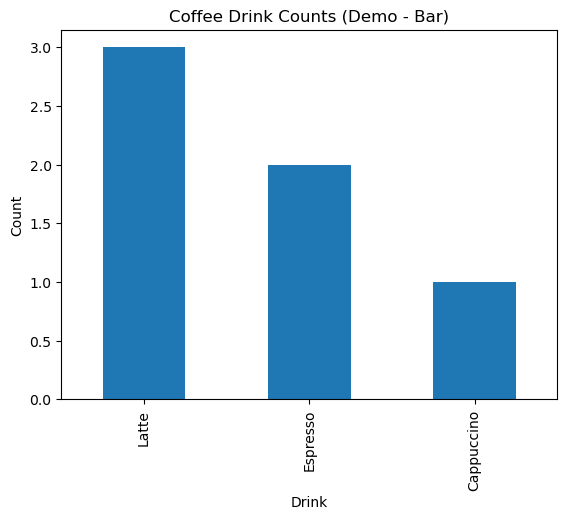

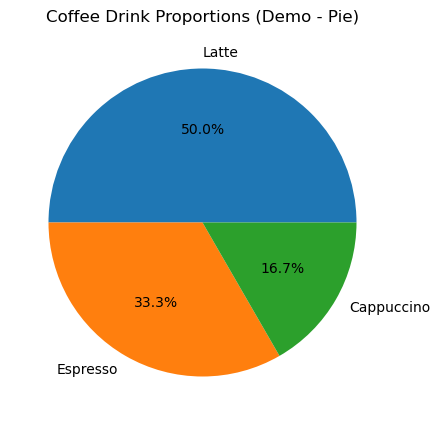

In [41]:

# Demo (bar + pie)
import matplotlib.pyplot as plt

coffee = pd.DataFrame({
    "drink": ["Latte", "Espresso", "Latte", "Cappuccino", "Latte", "Espresso"],
})
coffee_counts = coffee["drink"].value_counts()

# Bar
coffee_counts.plot(kind='bar')
plt.title("Coffee Drink Counts (Demo - Bar)")
plt.xlabel("Drink")
plt.ylabel("Count")
plt.show()

# Pie
coffee_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Coffee Drink Proportions (Demo - Pie)")
plt.ylabel("")
plt.show()



**Task:** Plot both a **bar chart** and a **pie chart** using `fur_counts`.
- Title and label the bar chart appropriately.
- Add percentages to the pie chart.


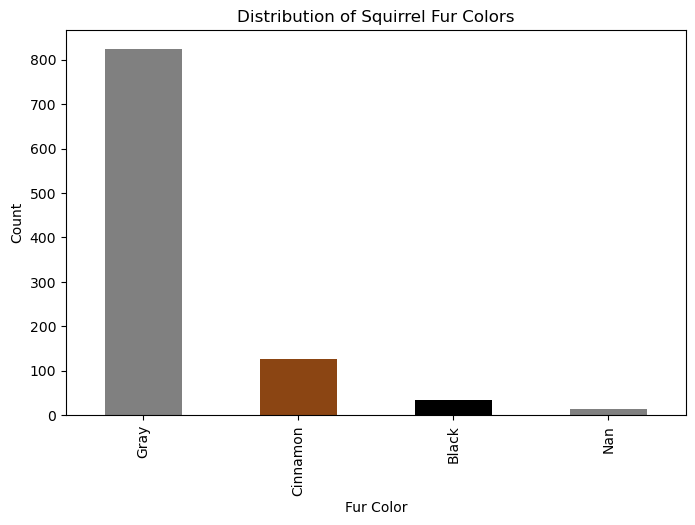

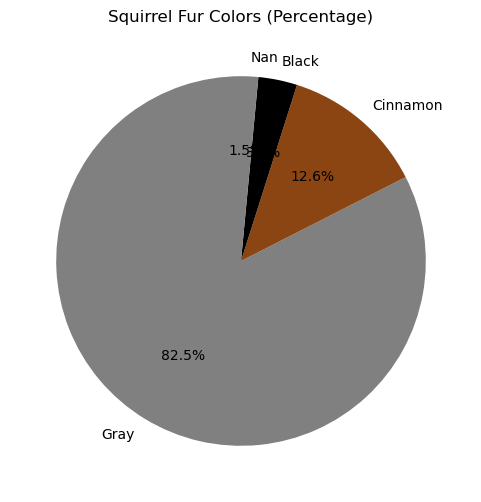

In [44]:

#TODO: Your task with the squirrel dataset!
#Please provide you code here

import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(8,5))
fur_counts.plot(kind='bar', color=['gray','saddlebrown','black'])
plt.title("Distribution of Squirrel Fur Colors")
plt.xlabel("Fur Color")
plt.ylabel("Count")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
fur_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gray','saddlebrown','black'])
plt.title("Squirrel Fur Colors (Percentage)")
plt.ylabel("")  # Remove default ylabel
plt.show()


## Step 6 — Interpret the results


**Task:** Write 3–5 sentences:
- Which fur color is most common?
- Are there close runners-up?
- What could explain the distribution?


In [ ]:
#TODO: Your task with the squirrel dataset!

The most common fur color is gray, followed by cinnamon and then black. Gray squirrels make up more than 80% of the total observations.
The next colors, cinnamon and black, are a lot less common and make up less than 20% of the total observations. There are also a few
missing / unknown values in the dataset, composing about 1.5% of the total observations. This survey shows the natural dobinance of 
grey colored squireels in Central Park, probably due to genetics or environmental factors.


## Independent Research Question  

**Research Question:**  
*Where are squirrels most spotted in Central Park? And why?*  

**Things to consider:**
- Are there any missing or malformed values in the `hectare` column?  
- Should you inspect/clean/standardize the hectare codes before counting?  
- Do some hectares naturally have more observations because...?
- Which visualization works best to your audience?

### Guidance (light touch, not step-by-step):  
- Use the `hectare` column, a grid ID that divides the park into rows A–I and columns 1–42.  
- Count how many squirrels were observed in each hectare.  
- Consider visualizing the results.   
- Write a short interpretation: Where are the hotspots? Why might those areas have more sightings?  

### Dataset Details: NYC OpenData
https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/about_data
